In [1]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import TweetTokenizer
import spacy

C:\Users\andre\AppData\Local\Temp\ipykernel_20080\1650075343.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
import nltk
import numpy as np
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
from collections import Counter
import re

In [3]:
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
file_path = 'D:\PythonCode\LN\8tavo\Hackaton\TwExtract-Claudiashein-20240424_124954.xlsx'
xls = pd.ExcelFile(file_path)

nlp_en = spacy.load("en_core_web_sm")  # usamos spacy para poder encontrar las stop words en ambos idiomas
nlp_es = spacy.load("es_core_news_sm")  

nltk.download('stopwords')

tokenizer = TweetTokenizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### funciones

In [5]:
def count_words(tweet, words):
    word_count = {}
    tokens = tweet.split()  
    for word in words:
        word_count[word] = tokens.count(word)
    return pd.Series(word_count)

In [6]:
from nltk.tokenize import TweetTokenizer #importamos el tokenizador
tweet_token= TweetTokenizer()

In [7]:
def preprocesar(text):  #Obtenemos tokens el texto

    text = re.sub(r'https?://\S+|www\.\S+', '', text) 
    text = text.lower()  # Convertimos en minusculas
    text = ''.join([c for c in text if c.isalnum() or c.isspace()])  # quitamos puntación
    
    # Tokenization
    tokens = tweet_token.tokenize(text)
    stopwords_list = stopwords.words('spanish')
    
    filtered_tokens = [word for word in tokens if word not in stopwords_list]  # Usamos los tokens filatrados
    
    
    return " ".join(filtered_tokens)


In [8]:


def remove_numbers(text): #Quitar numeros del texto
    return re.sub(r'\d+', '', text)

### Dataframe Limpio

In [9]:
cleaned_data = []

for sheet in xls.sheet_names:
    df = pd.read_excel(xls, sheet_name=sheet)
    for index, row in df.iterrows():
        #Ajustar la columna opinion y el lenguaje a idioma
        cleaned_text = preprocesar(row['tweetText'])
        cleaned_text = remove_numbers(cleaned_text)
        cleaned_data.append({
            'ID': row['id'],
            'Cleaned_Tweet': cleaned_text,
            'Type': row['type'],
            'Author': row['tweetAuthor'],
            'Handle': row['handle'],
            'ReplyCount': row['replyCount'],
            'QuoteCount': row['quoteCount'],
            'RetweetCount': row['retweetCount'],
            'LikeCount': row['likeCount'],
            'Views': row['views'],
            'BookmarkCount': row['bookmarkCount'],
            'CreatedAt': row['createdAt'],
            'MediaURLs': row['allMediaURL'],
            'VideoURL': row['videoURL']
        })

# Convertimos la lista de datos en un dataframe
cleaned_df = pd.DataFrame(cleaned_data)


### Lineas temporales

In [10]:
cleaned_df['CreatedAt'] = pd.to_datetime(cleaned_df['CreatedAt']).dt.date

### Palabras set 1

In [11]:
palabras1 = ['mujeres', 'educación', 'justicia']

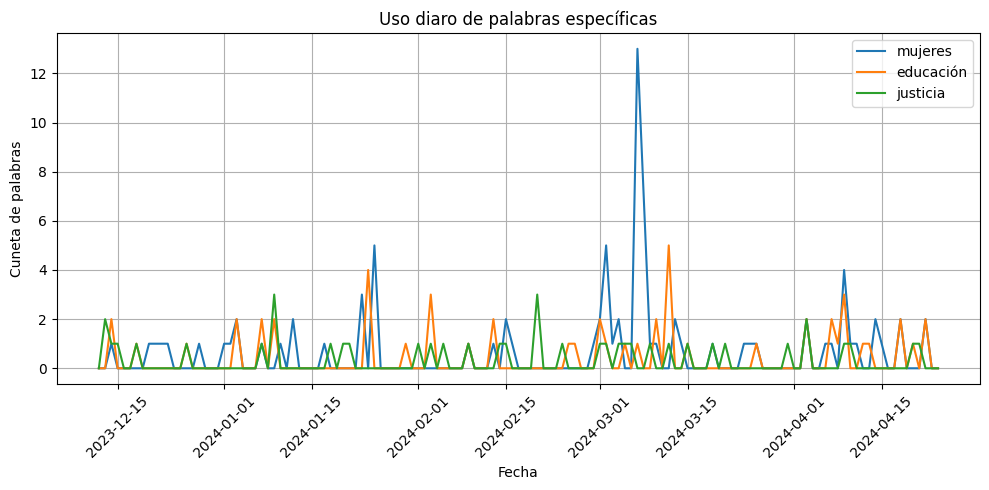

In [12]:
word_counts_by_day = cleaned_df.apply(lambda x: count_words(x['Cleaned_Tweet'], palabras1), axis=1)
word_counts_by_day['CreatedAt'] = cleaned_df['CreatedAt']
word_counts_by_day = word_counts_by_day.groupby('CreatedAt').sum()

plt.figure(figsize=(10, 5))
for word in palabras1:
    plt.plot(word_counts_by_day.index, word_counts_by_day[word], label=word)

plt.title('Uso diaro de palabras específicas')
plt.xlabel('Fecha')
plt.ylabel('Cuneta de palabras')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Palabras set 2

In [13]:
palabras2 = ['jóvenes', 'seguridad', 'economía']

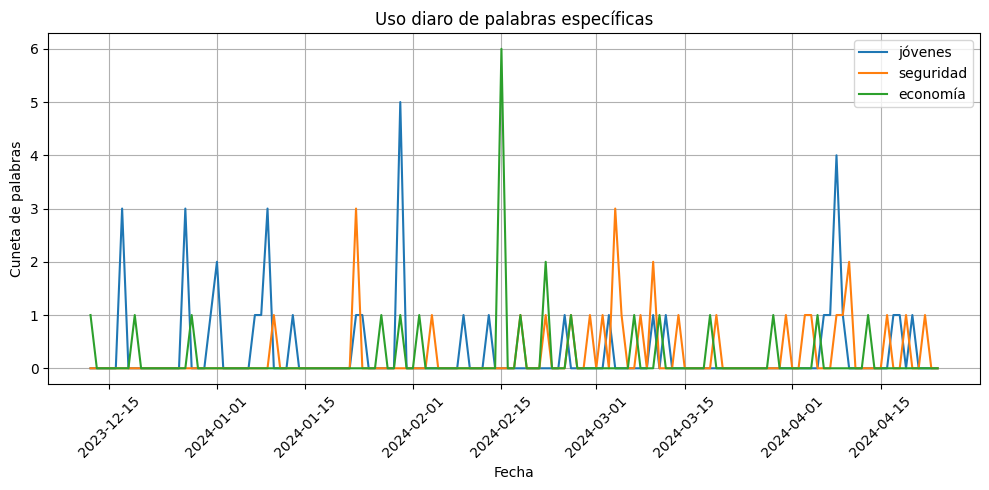

In [14]:
word_counts_by_day = cleaned_df.apply(lambda x: count_words(x['Cleaned_Tweet'], palabras2), axis=1)
word_counts_by_day['CreatedAt'] = cleaned_df['CreatedAt']
word_counts_by_day = word_counts_by_day.groupby('CreatedAt').sum()

plt.figure(figsize=(10, 5))
for word in palabras2:
    plt.plot(word_counts_by_day.index, word_counts_by_day[word], label=word)

plt.title('Uso diaro de palabras específicas')
plt.xlabel('Fecha')
plt.ylabel('Cuneta de palabras')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()